# Simple Linear Regression
**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

Author: Laukit Mandal

**Importing the Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Loading the data and making it a Pandas data frame**

In [3]:
data= pd.read_csv('studentdata.csv')

**Shape of the data**


In [4]:
data.shape

(25, 2)

**Showing some part of the data**

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Finding the Null values in the data**

In [6]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Visualizing The Data for any Null values**

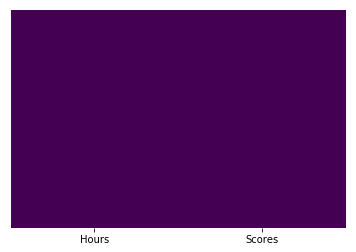

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Plotting The Data for further Exploration**

<function matplotlib.pyplot.show(*args, **kw)>

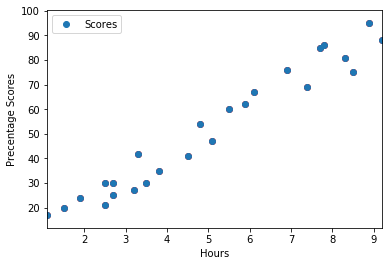

In [27]:
data.plot(x='Hours', y='Scores', style='o')  
plt.scatter(data['Hours'],data['Scores'],color= 'Red')
plt.ylabel('Precentage Scores')
plt.xlabel('Hours')
plt.show

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing the data
**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

**X stands for Features
y stands for Labels**

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 



# Splitting the Data
**The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.**


In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm (Linear Regression)
**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

**And Plotting Regression Line**

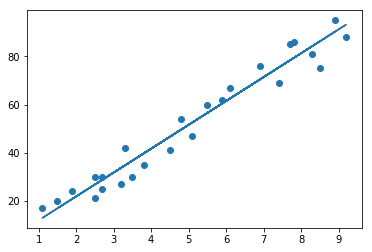

In [23]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()



# Making Predictions
**Now that we have trained our algorithm, it's time to make some predictions.**

In [28]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted**

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating The Model

In [30]:
from sklearn import metrics  
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Square Error: 4.647447612100373


# Deploying The Model According to Our Use
**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [39]:
Hours = [[9.25]]
own_pred = regressor.predict(Hours)
print("Hours Studied = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))


Hours Studied = [[9.25]]
Predicted Score = 93.69173248737539
